<a href="https://colab.research.google.com/github/Hiago-Cavalcante/Projeto_IA/blob/main/(Hiago_e_Eduardo)_Minera%C3%A7%C3%A3oDados_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DEFINIÇÃO DO PROBLEMA:**

###  Uma operadora de telefonia móvel deseja lançar uma campanha de Natal, de forma a oferecer dispositivos aos clientes junto à contratação de planos de dados e serviços. Para tanto, é necessário separar os celulares disponíveis no catálogo com base em seu valor de mercado. O objetivo dessa atividade é desenvolver e avaliar o resultado de modelos de aprendizado de máquina que podem ser utilizados para esta finalidade.

### **Atenção para o processo de análise **

### 1) Análise Exploratória dos dados

### 2) Tratamento dos dados

### 3) Separação dos dados em conjuntos para treinamento e teste

### 4) Desenvolvimento do modelo de aprendizado de máquina

### 5) Avaliação do modelo



In [ ]:
# Carregando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#### 1.1 *(valor: 2.0 pontos)* A capacidade de armazenamento interno e a capacidade de memória RAM são diferenciais para os celulares de custo médio e alto custo? Justifique sua resposta apresentando o padrão revelado a partir desses atributos.



In [ ]:
# Importando dados

dados = pd.read_csv('/content/campanhaNatalTIM.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Verificando os dados brutos
dados.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Substituímos os valores zero pelo valor mínimo positivo da coluna
colunas_para_tratar= ['px_height', 'sc_w']
for coluna in colunas_para_tratar:
    min_positivo = dados[coluna][dados[coluna] > 0].min()
    dados[coluna] = dados[coluna].replace(0, min_positivo)

In [ ]:
dados.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<ipython-input-80-c4fbe193cedb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='price_range', y='int_memory', palette='viridis')
<ipython-input-80-c4fbe193cedb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='price_range', y='ram', palette='viridis')


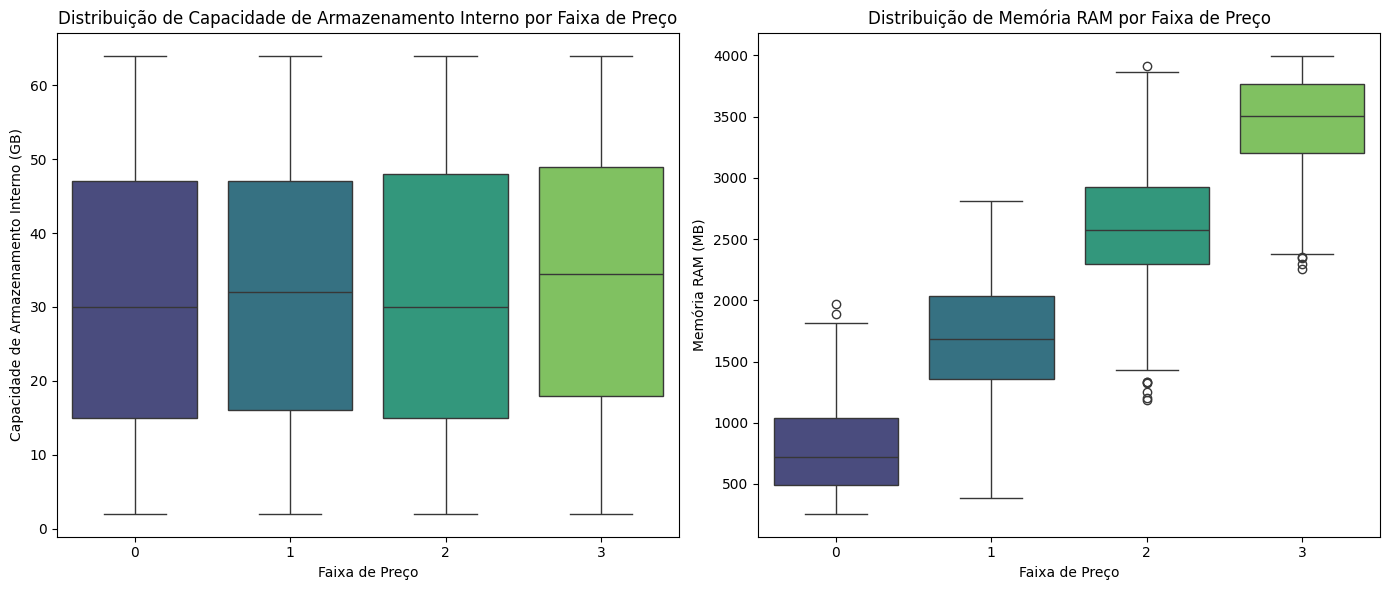

In [ ]:
# Análise da capacidade de armazenamento interno e memória RAM por faixa de preço
plt.figure(figsize=(14, 6))

# Distribuição de int_memory por faixa de preço
plt.subplot(1, 2, 1)
sns.boxplot(data=dados, x='price_range', y='int_memory', palette='viridis')
plt.title('Distribuição de Capacidade de Armazenamento Interno por Faixa de Preço')
plt.xlabel('Faixa de Preço')
plt.ylabel('Capacidade de Armazenamento Interno (GB)')

# Distribuição de ram por faixa de preço
plt.subplot(1, 2, 2)
sns.boxplot(data=dados, x='price_range', y='ram', palette='viridis')
plt.title('Distribuição de Memória RAM por Faixa de Preço')
plt.xlabel('Faixa de Preço')
plt.ylabel('Memória RAM (MB)')

plt.tight_layout()
plt.show()

Sim,  a quantidade de ram influenciam no preço de forma diretamente proporcional comparando os valores dos celulares de custo medio á de alto custo pelo fator de que, ao interpretar o grafico e nitidido a maneira de quanto maior a faixa de preço maior a quantidade de memoria ram mas em relação a capacidade de armazenamento interno o a faixa de preço não tem uma mudança muito notavel em comparaçao à ram

#### 1.2 *(valor: 3.0 pontos)*Analise a relevância da capacidade de bateria, capacidade de armazenamento, capacidade de imagem (características das câmeras) e peso do aparelho no valor do celular. Apresente conclusões, a partir da interpretação das métricas e/ou elementos visuais utilizados para a referida análise.

#### Avaliação dessa questão:
##### 1.0 ponto para corretude da implementação da estratégia
##### 2.0 pontos para corretude da interpretação e conclusão

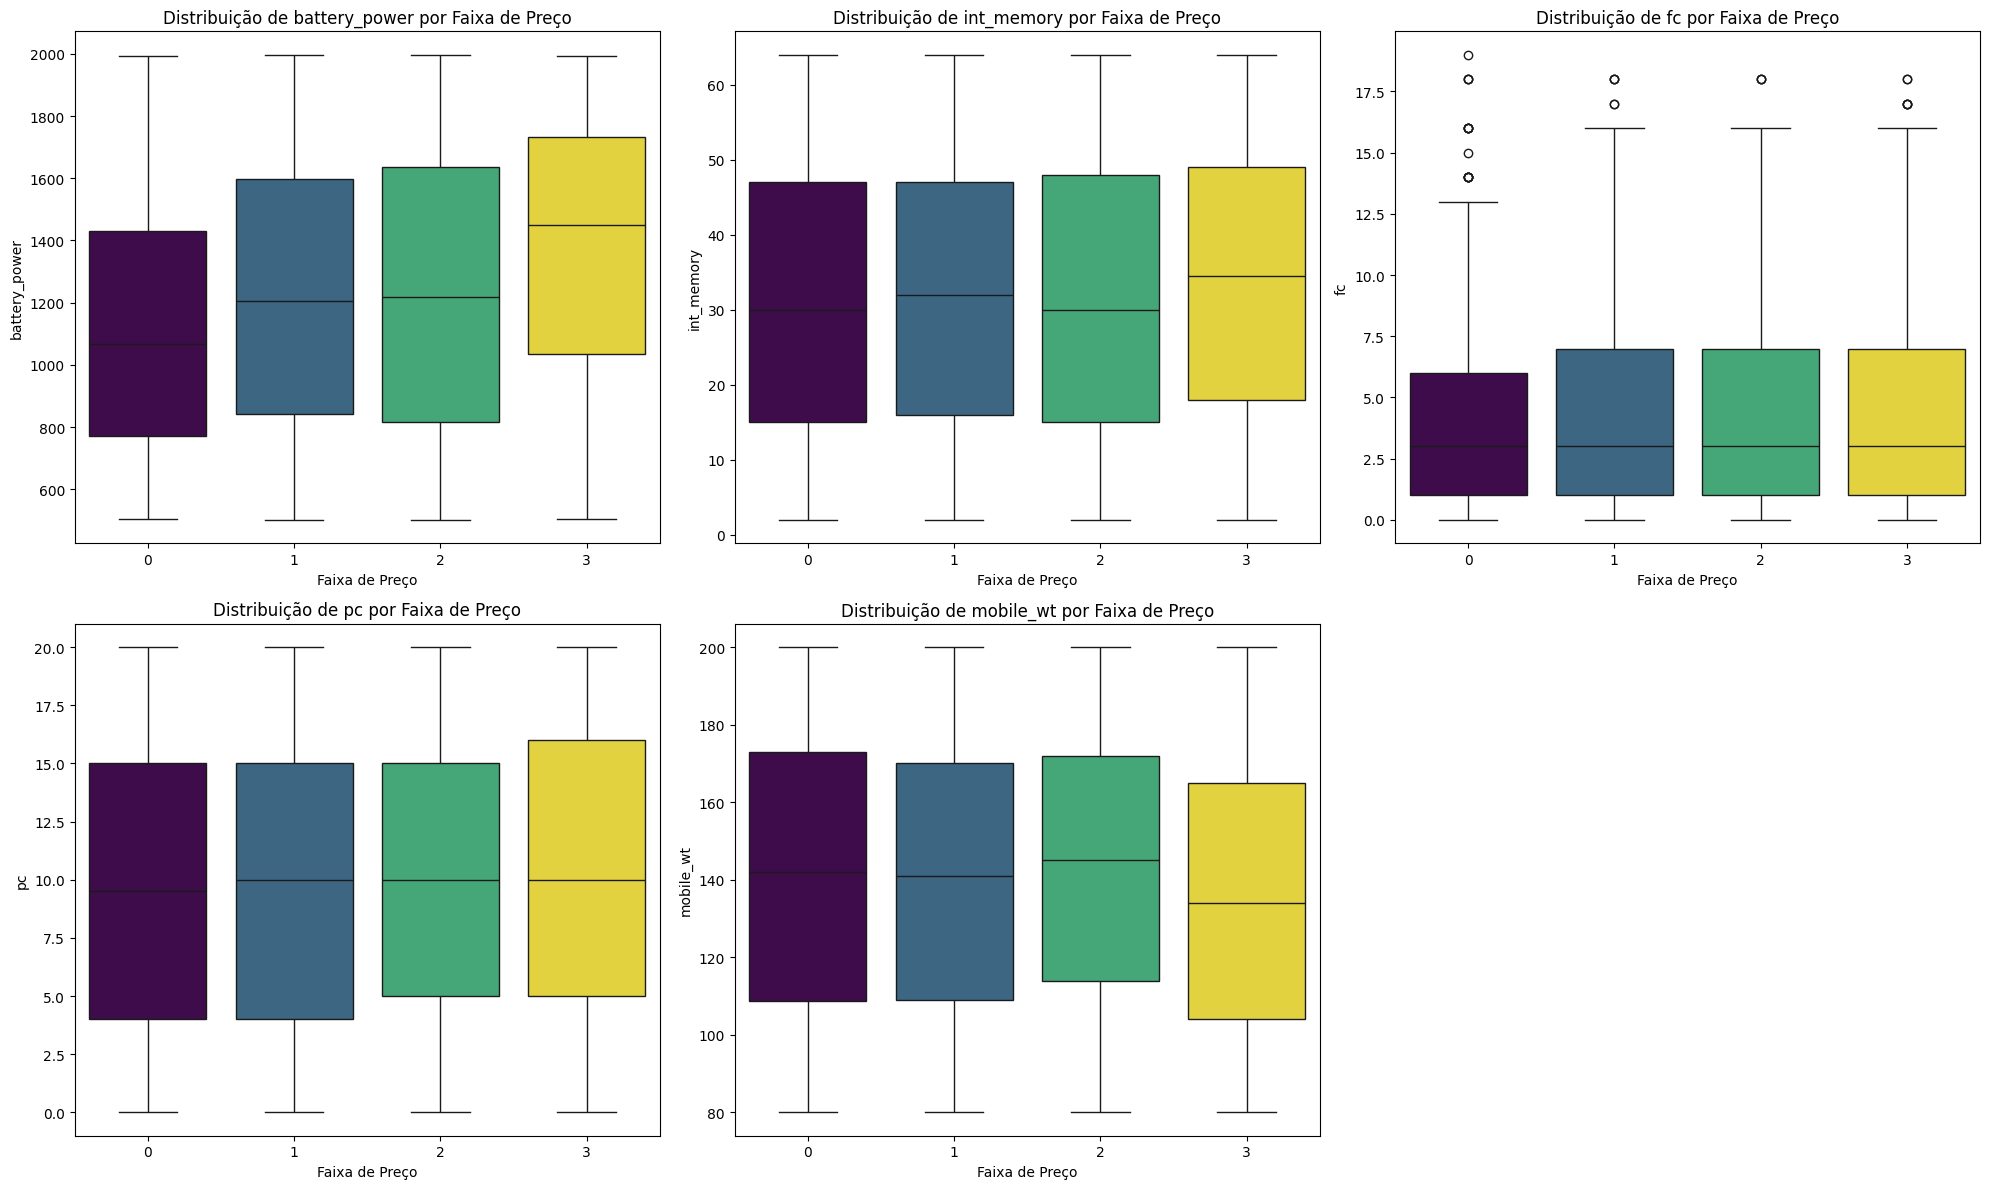

In [ ]:
variaveis = ['battery_power', 'int_memory', 'fc', 'pc', 'mobile_wt']


plt.figure(figsize=(20, 12))
for i, var in enumerate(variaveis, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dados, x='price_range', y=var, hue='price_range', palette='viridis', dodge=False, legend=False)
    plt.title(f'Distribuição de {var} por Faixa de Preço')
    plt.xlabel('Faixa de Preço')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


Com a analise das variaveis ['battery_power', 'int_memory', 'fc', 'pc', 'mobile_wt'] nos graficos de boxplot podemos perceber que as variaveis alem da de poder da bateria possuem valores bastante iguais o que se pode revelar que não irao possuir uma grande interferencia na analise, ja analizando a força da bateria a distribuiçao dos dados com relação a faixa de custo dos celulares pode se observar que existe uma crescente em relaçao ao poder da bateria em relação ao preço. Também é possivel observar no Boxplot das cameras frontais alguns outliers que revelam que a câmera frontal tem uma relação baixissima com o valor do celular, inclusive apresentando essas discrepancias além de uma baixa alteração no preço conforme a qualidade da câmera.

#### 1.3 (valor: 1.0 ponto) O trecho de código abaixo implementa uma análise da correlação entre os atributos. Realize as devidas adaptações no código e tome decisão acerca dos atributos relevantes para a finalidade de aprendizado de máquina com foco na classificação dos celulares em relação ao custo.

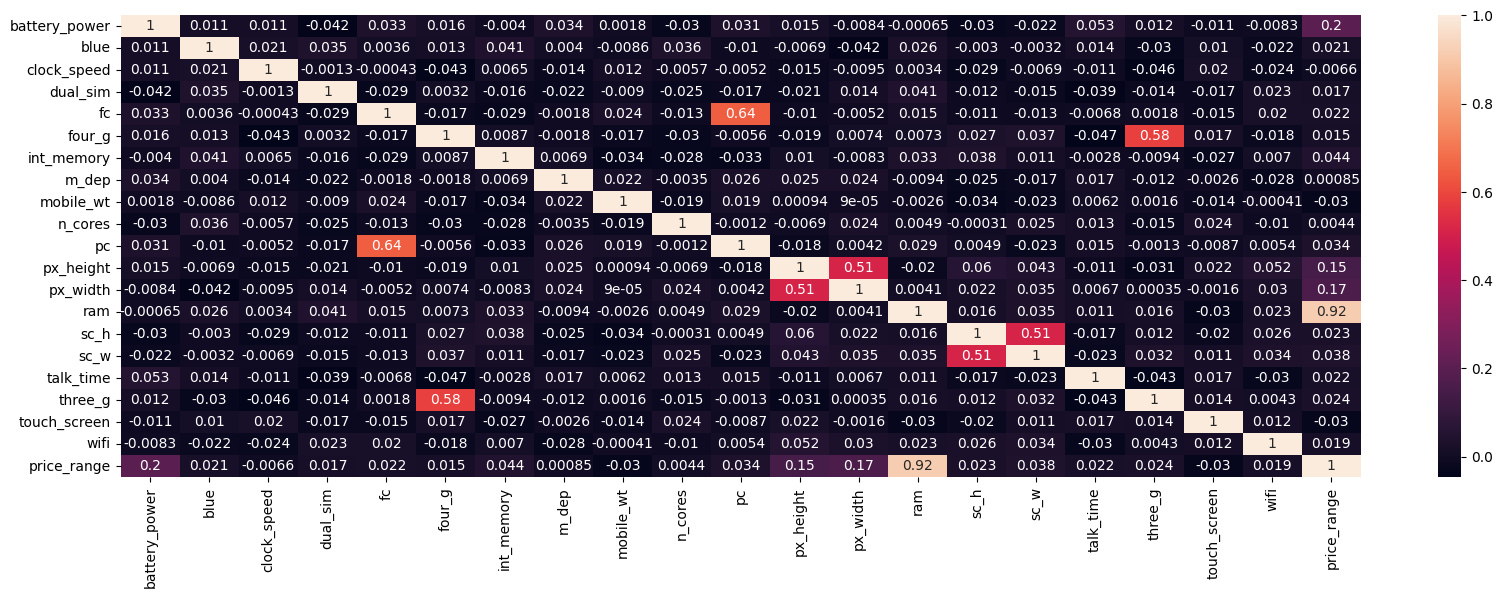

In [ ]:
plt.figure(figsize=(20,6))

correlacaoAtributos= dados.corr()

sns.heatmap(correlacaoAtributos, annot = True);

In [ ]:
# Rankeamento da correlação dos atributos com a variavel "price_range"

alvo_mapheat = correlation_matrix['price_range'].sort_values(ascending=False)
print("Correlação com 'price_range':\n")
print(alvo_mapheat)

Correlação com 'price_range':

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148859
int_memory       0.044435
sc_w             0.037934
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


Em relação ao heat map podemos observar que os atributos mais importantes para criar um modelo de aprendizado de maquina são a correçao da ram com a faixa de preço sendo de longe a mais importante, além das battery power a resolução da tela em pixels.

#### 1.4 (valor 1.5 pontos)  Desenvolva modelos de aprendizado de máquina para, a partir dos atributos selecionados, classificar os celulares disponíveis no catálogo da empresa.  

#### Modelos a serem implementados: Regressão Logística/ Árvore de Decisão/ Floresta Randômica

###### SE NECESSÁRIO, CODIFICAR AS VARIÁVEIS QUALITATIVAS. SE HOUVER DIFERENÇA DE ESCALA DOS DADOS QUANTITATIVOS UTILIZADOS PARA A PREVISÃO, UMA BOA PRÁTICA A SER ADOTADA É A PADRONIZAÇÃO DOS DADOS A PARTIR DO COMANDO A SEGUIR - COM AS DEVIDAS ADAPTAÇÕES:

scaler = StandardScaler().fit(atributosQuantitativos)

atributosQuantitativos=scaler.transform(atributosQuantitativos)


In [ ]:
# Cálculo de estatísticas descritivas adicionais
additional_stats = dados.groupby('price_range')[['battery_power', 'px_height', 'mobile_wt', 'int_memory']].agg(['mean', 'median', 'std'])
print("Estatísticas descritivas adicionais:\n")
print(additional_stats)

Estatísticas descritivas adicionais:

            battery_power                     px_height                     \
                     mean  median         std      mean median         std   
price_range                                                                  
0                1116.902  1066.0  410.801305   536.408  465.5  372.824164   
1                1228.868  1206.0  438.614528   666.894  606.0  441.348184   
2                1228.320  1219.5  452.863065   632.284  538.5  445.789232   
3                1379.984  1449.5  414.992261   744.850  674.0  483.717095   

            mobile_wt                   int_memory                    
                 mean median        std       mean median        std  
price_range                                                           
0             140.552  142.0  36.378319     31.174   30.0  18.101023  
1             140.510  141.0  35.678956     32.116   32.0  18.000739  
2             143.614  145.0  34.320326     30.920   30.0  1

In [ ]:
atributos_relevantes = alvo_mapheat[alvo_mapheat > 0.2].index.tolist()
atributos_relevantes.remove('price_range')
print("Atributos relevantes para classificação:\n")
print(atributos_relevantes)

Atributos relevantes para classificação:

['ram', 'battery_power']


In [ ]:
# Separação dos dados em treinamento e teste
X = dados[atributos_relevantes]
y = dados['price_range']

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Regressão Logística
modelo_rg = LogisticRegression()
modelo_rg.fit(X_train, y_train)
y_pred_log = modelo_rg.predict(X_test)
print("\nResultados - Regressão Logística:\n")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Resultados - Regressão Logística:

Acurácia: 0.8116666666666666
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       151
           1       0.79      0.79      0.79       146
           2       0.69      0.73      0.71       148
           3       0.86      0.80      0.83       155

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



In [ ]:
# Árvore de Decisão
modelo_ad = DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_train, y_train)
y_pred_ad = modelo_ad.predict(X_test)
print("\nResultados - Árvore de Decisão:\n")
print("Acurácia:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Resultados - Árvore de Decisão:

Acurácia: 0.7366666666666667
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       151
           1       0.66      0.66      0.66       146
           2       0.59      0.65      0.62       148
           3       0.83      0.78      0.81       155

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600



In [ ]:
# Floresta Randômica
modelo_fr = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_fr.fit(X_train, y_train)
y_pred_rf = modelo_fr.predict(X_test)
print("\nResultados - Floresta Randômica:\n")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Resultados - Floresta Randômica:

Acurácia: 0.7916666666666666
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       151
           1       0.74      0.75      0.75       146
           2       0.67      0.72      0.69       148
           3       0.87      0.79      0.83       155

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



#### 1.5 (valor 2.5 pontos) Apresente conclusões sobre o desempenho dos modelos implementados na classificação de celulares de médio custo e celulares de custo muito alto. Utilize as métricas para argumentação sobre o desempenho nessas categorias.

In [ ]:
# Avaliar desempenho por classe específica (médio custo e custo muito alto)
report = classification_report(y_test, y_pred_rf, output_dict=True)
medium_cost_performance = report['1']  # Classe médio custo
very_high_cost_performance = report['3']  # Classe custo muito alto

print("Desempenho - Classe Médio Custo:", medium_cost_performance)
print("Desempenho - Classe Custo Muito Alto:", very_high_cost_performance)


Desempenho - Classe Médio Custo: {'precision': 0.7432432432432432, 'recall': 0.7534246575342466, 'f1-score': 0.7482993197278912, 'support': 146.0}
Desempenho - Classe Custo Muito Alto: {'precision': 0.8661971830985915, 'recall': 0.7935483870967742, 'f1-score': 0.8282828282828283, 'support': 155.0}


Com base nos modelos analizados podemos dizer que em relação a regressao, a Acurácia geral foi 81.16%. e em relação ao custo medio(1) teve a precisão de 0.79 ja a de custo alto(3) teve a Precisão de 0.86. Portanto a regressão logística apresentou bom desempenho geral, com ligeira superioridade na classe de custo muito alto. O modelo equilibrou bem as métricas entre as classes. Ja o modelo de arvore de deciçao a Acurácia geral foi de 73.67%. E em relação ao custo medio(1) teve uma precição de 0.66, ja a de custo alto(3) teve uma precisão de 0.83. Assim modelo apresentou desempenho inferior à regressão logística. Houve maior dificuldade em diferenciar as classes de médio custo e custo muito alto. E por fim o modelo de floresta rondomica teve uma Acurácia geral de 79.17%, o custo medio(1) teve uma precição de 0.74, e a de custo alto(3) teve uma precisão de 0.87. E então o modelo Random Forest apresentou desempenho intermediário, com boa capacidade de distinguir as classes, mas menor acurácia geral que a regressão logística. Por fim observamos que o melhor modelo baseando nesses dados foi o de Regressão.